In [1]:
# Setup 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
colors = sns.color_palette()

Stall Speed

[34.59820521 39.92100601 45.24380681 50.56660761]


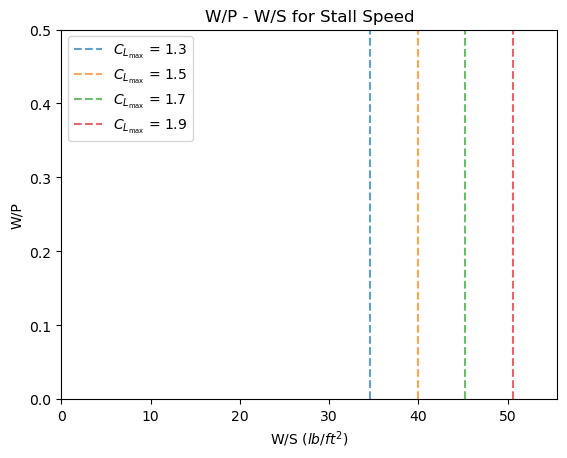

In [2]:
# CL_max is within 1.3 - 1.9

rho = 1.8685e-3 # slugs/ft^3, assuming average cruise of 8,000 ft
v_stall = 1.68781 * 100 # Convert kts to ft/s
CL_max = np.array([1.3, 1.5, 1.7, 1.9]) # Variable range of CL_max values based on Table 3.1 in Roskam

# Calculate wing loading based on stall speed
W_S = 0.5 * rho * v_stall**2 * CL_max # lb/ft^2 
print(W_S)

# Plot W/S vs W/P
plt.figure()
for i, ws in enumerate(W_S):
    plt.axvline(x=ws, color=colors[i], linestyle='--', alpha=0.7, label=f'$C_{{L_{{\\text{{max}}}}}}$ = {CL_max[i]:.1f}')
plt.title('W/P - W/S for Stall Speed')
plt.xlabel("W/S $(lb/ft^2)$")
plt.ylabel("W/P")
plt.xlim(0, max(W_S)+5)
plt.ylim(0, 0.5)
plt.legend(loc='best')
plt.show()

Takeoff

149.54951952464464


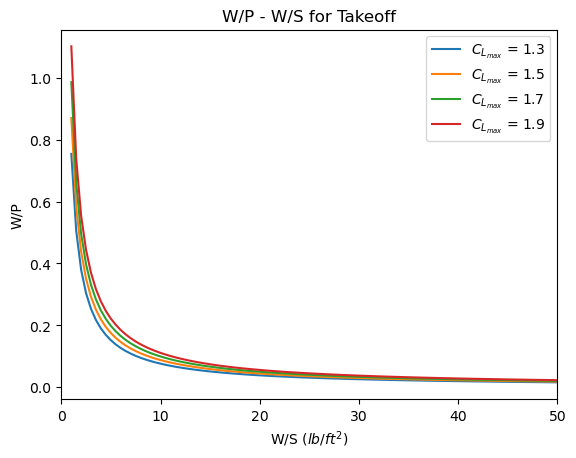

In [3]:
S_TO_G = 1000 # ft
S_TO = 1500 # ft
rho_SL = 23.77e-4 #slugs/ft3

# Relating S_TO to TOP_23
TOP_23 = (-8.134 + np.sqrt(8.314**2 - 4 * 0.0149 * -S_TO)) / (2 * 0.0149)
print(TOP_23)

W_S = np.linspace(1,50,100) # Create W/S array
k_s = 1.2 # Takeoff speed factor
v_TO = k_s * v_stall # Takeoff velocity

# Plotting W/P vs W/S
plt.figure()
for CL_max in CL_max:
    P_W = (TOP_23 * (rho / rho_SL) * CL_max) / (v_TO * W_S)
    plt.plot(W_S, P_W, label=f'$C_{{L_{{max}}}}$ = {CL_max}')
plt.title('W/P - W/S for Takeoff')
plt.xlabel("W/S $(lb/ft^2)$")
plt.ylabel("W/P")
plt.xlim(0,50)
plt.legend(loc='best')
plt.show()

Landing

In [ ]:
#Balanced field length
BFL= TOP_23*37.5
print(f"Required field length: {BFL} feets")

#Calculating landing distance
CL_max_values = np.array([1.3, 1.5, 1.7, 1.9])
W_TO = 19000 #lbs
W_L = 17000 #lbs
S_ref = 534.37 #lifting area
S_a = 600 # 600 ft for general aviation
for CL_max in CL_max_values:
    S_L_G = 80 * (W_L / S_ref) / (rho/rho_SL * CL_max) + S_a
    print(f"For CL_max = {CL_max}: Landing ground roll distance = {S_L_G} feet")

#Calculate W/S
S_land = BFL *  0.6
W_S =  (rho/rho_SL * CL_max_values) / (80*0.65) * (S_land - S_a)

# Plot W/S vs W/P
plt.figure()
for i, ws in enumerate(W_S):
    plt.axvline(x=ws, color=colors[i], linestyle='--', alpha=0.7, label=f'$C_{{L_{{\\text{{max}}}}}}$ = {CL_max_values[i]:.2f}')
plt.title('T/W - W/S for Landing Constraint')
plt.xlabel("W/S $(lb/ft^2)$")
plt.ylabel("T/W")
plt.xlim(0, max(W_S)+5)
plt.ylim(0, 0.5)
plt.legend(loc='best')
plt.show()

#TW calculation
TW_landing = np.tile(W_S, 50)
print(f"TW_landing: {TW_landing}")

Climb

In [ ]:
# climb analysis
# FAR 23 Requirements

def PW_vs_WS(
        G,
        CD,
        CL,
        WS
):
    PW = (G + (CL/CD)**(-1))/(CL**(1/2)) * (WS**(1/2))/(18.97*0.8)

    return PW

N = 100
WS = np.linspace(0,N,N+1)

CD0 = 0.01849
k = 0.04198
G_LVL1 = 0.083 # 8.3% for landplanes
ks = 1.2
# MTOW, flaps down, AEO, 0.94*T_TO

case1_PW = []

for i in WS:
    case1_PW.append(PW_vs_WS(G=G_LVL1,CD=CD0,CL=1.9,WS=i)**(-1))


G_LVL1_2 = 0.015 # at 5000ft
# MTOW, flaps up, OEI, T_TO

case2_PW = []

for i in WS:
    case2_PW.append((PW_vs_WS(G=G_LVL1_2,CD=CD0,CL=1.3,WS=i)*(12/11))**(-1))



G_balk = 0.03
ks_balk = 1.3
#MTOW, landing flaps, AEO

case3_PW = []

for i in WS:
    case3_PW.append(PW_vs_WS(G=G_balk,CD=CD0,CL=1.9,WS=i)**(-1))

plt.figure()
plt.plot(WS,case1_PW,label="Level 1, CL=1.9, AEO")
plt.plot(WS,case2_PW,label="Level 1, CL=1.3, OEI")
plt.plot(WS,case3_PW,label="Balked, CL=1.9, AEO")
plt.xlabel('W/S')
plt.ylabel('W/P')
plt.legend()
plt.title('Climb')
plt.show()

Cruise Speed

In [ ]:
# Cruise
V_max = 250 * 1.6878 #ft/s
V_stall = 100 * 1.6878 #ft/s
q_cruise_max = 1/2*rho*V_max**2
q_cruise_low = 1/2*rho*V_stall**2

cruisePW_max = []

for i in WS:
    cruisePW_max.append((V_max/0.8*((q_cruise_max*CD0)/i + k/q_cruise_max*(i)))**(-1))

cruisePW_low = []

for i in WS:
    cruisePW_low.append((V_stall/0.8*((q_cruise_low*CD0)/i + k/q_cruise_low*(i)))**(-1))

plt.figure()
plt.plot(WS,cruisePW_max,label="Crusing at V_max")
plt.plot(WS,cruisePW_low,label="Crusing at V_stall")
plt.xlabel('W/S')
plt.ylabel('W/P')
plt.legend()
plt.title('Cruise (8000ft Alt)')
plt.show()

Ceiling

In [ ]:
# Constants
W = 16856  # Takeoff Weight (lb)
S_ref = 534.375  # Reference Wing Area (ft^2)
e = 0.7558  # Oswald's Efficiency Factor
Cd0 = 0.01849  # Zero Lift Drag Coefficient
AR = 10.03268  # Aspect Ratio
prop_eff = 0.8  # Propeller Efficiency
CL_clean = 1.3  # Lift Coefficient (Clean Configuration 1)

max_alt = 25000  # Maximum Altitude (ft)
rho = 0.0343  # Air Density at 25,000 ft (lb/ft^3)

# Induced Drag Factor
k = 1 / (np.pi * e * AR)

# Minimum Thrust-to-Weight Ratio
T_W_min = 2 * np.sqrt(k * Cd0)

# Wing Loading Values (start from 0.1 to avoid division by zero)
W_S_vals = np.linspace(0.1, 150, 100)

# Absolute Ceiling Values
abs_ceiling_vals = [T_W_min] * 100

# Velocity and W/P Calculations for CL = 1.3
V_1 = np.sqrt((2 * W) / (rho * CL_clean))
W_P = (T_W_min ** (-1)) * prop_eff / V_1
W_P_vals = [W_P] * 100

# Print Results
print(f"Induced Drag Factor: k = {k:.5f}")
print(f"Minimum Thrust over Weight: T/W = {T_W_min:.4f}")

# Plot 1: Absolute Ceiling (T/W vs W/S)
plt.figure(figsize=(8, 6))
plt.plot(W_S_vals, abs_ceiling_vals, label="Absolute Ceiling", color='b')

plt.xlim(0, 150)
plt.ylim(0, T_W_min * 3)

plt.xlabel("W/S (lb / ft^2)")
plt.ylabel("T/W")
plt.title("Ceiling Design Constraint")
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Weight-to-Power Ratio (W/P vs W/S)
plt.figure(figsize=(8, 6))
plt.plot(W_S_vals, W_P_vals, label="W/P (CL = 1.3)", color='r', linestyle='--', alpha=0.7)

plt.xlim(0, 150)
plt.ylim(0, 0.1)  # Adjust y-axis limit dynamically

plt.xlabel("W/S (lb / ft^2)")
plt.ylabel("W/P (lb/hp)")
plt.title("Weight-to-Power Ratio Constraint")
plt.legend()
plt.grid(True)
plt.show()

Maneuver